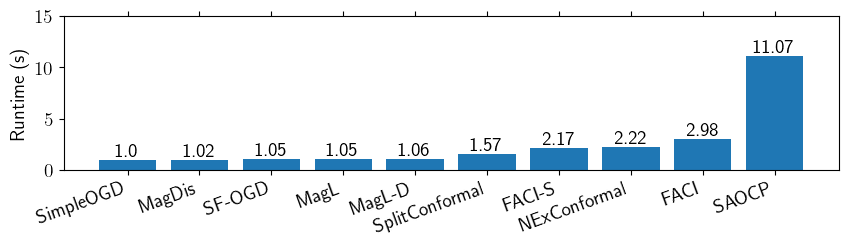

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set default properties for plots (similar to MATLAB settings)
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['axes.titlesize'] = 24
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.figsize'] = [6.70, 2.25] # Size in inches

# Data
data = np.load("runtime_results.npz", allow_pickle=True)

methods = np.array(["SimpleOGD", "MagDis", "SplitConformal", "NExConformal", "FACI", "SF-OGD", "FACI-S", "SAOCP", "MagL-D", "MagL"])

run_time = data['mean_time_norm']

# Sorting
idx = np.argsort(run_time)
run_time = run_time[idx] / run_time[idx][0]
methods = methods[idx]

# Plotting
fig = plt.figure(figsize=(10, 2))
bars = plt.bar(methods, run_time)

# Adding text on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), 
        verticalalignment='bottom', horizontalalignment='center', fontsize=14)

plt.ylabel("Runtime (s)")
plt.ylim([0, 15])


# Set x axis tick labels to be at the top
plt.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=True, labeltop=False)
plt.xticks(rotation=20, ha="right") # Rotate x labels for better readability

plt.show()

import os
__file__ = "runtimefigure.ipynb"
figdir = os.path.join(os.path.dirname(os.path.abspath(__file__)), "figures")
os.makedirs(figdir, exist_ok=True)
fig.savefig(os.path.join(figdir, "TinyImageNet_Runtime.pdf"),bbox_inches='tight', pad_inches=0.1)